In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tike

In [17]:
NPIXEL = 16
PIXEL_SIZE = 1/NPIXEL
TOTAL_TIME = 1.0
region = np.array([[-PIXEL_SIZE, PIXEL_SIZE], [-1, 1], [-1, 1]])/2
ideal_mean = TOTAL_TIME * PIXEL_SIZE
S_FREQ = 1/2**11

def circle_density(x, y, radius=PIXEL_SIZE/2):
    """Return True for (x,y) contained by the circle with given radius"""
    return x**2 + y**2 <= radius**2


probe = tike.Probe(density_profile=None,
                   width=PIXEL_SIZE,
                   aspect=1.0)

def get_mask(A):
    """Return a boolean mask for dimensions 1 & 2 of A"""
    assert A.shape[1] == A.shape[2]
    radius = A.shape[1] / 2.0
    coords = np.arange(A.shape[1]) - A.shape[1] / 2.0 + 0.5,
    x, y = np.meshgrid(coords, coords)
    mask = circle_density(x, y, radius=radius)
    return mask


def get_metric(coverage):
    """Return the standard deviation from the ideal coverage from the region
    inside the cylindrical mask
    """
    ideal_mean = TOTAL_TIME * PIXEL_SIZE
    x = coverage[:, get_mask(coverage)].flatten()
    metric = np.sqrt(np.sum((ideal_mean - x)**2) / x.size) - np.mean(x)
    return metric

def fly2D(t, N_rotation=0):
    h = t / TOTAL_TIME - 0.5 #* (1 + PIXEL_SIZE)
    v = 0 * t
    theta = np.pi/3 +  N_rotation * 2 * np.pi * t / TOTAL_TIME
    return theta, h, v

def raster2Dt(t, N_raster=1):
    h = tike.triangle(0.5, N_raster/2, np.pi/2, t)
    v = 0 * t
    theta = 2 * np.pi * t / TOTAL_TIME
    return theta, h, v

def raster2Ds(t, N_raster=1):
    h = tike.sinusoid(0.5, N_raster/2, np.pi/2, t)
    v = 0 * t
    theta = 2 * np.pi * t / TOTAL_TIME
    return theta, h, v

# 2D coverage as a function of rotation speed

Show a bunch of plots as a function of number of rotations per raster traversal.

In [18]:
# More rotations than raster traversals
num_rotations = 2 ** np.arange(0,6)
coverage_maps = list()
for R in num_rotations:
    kwargs = {'N_rotation' : R}
    tstep_guess = TOTAL_TIME / (NPIXEL * max(1, R))
    coverage = probe.coverage(trajectory=fly2D, region=region,
                              pixel_size=PIXEL_SIZE,
                              tmin=0, tmax=TOTAL_TIME, tstep=tstep_guess,
                              tkwargs=kwargs)
    coverage_maps.append(coverage)

INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 524,288 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 1,048,576 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 2,097,152 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 4,194,304 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 8,388,608 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 16,777,216 lines
INFO:root: coverage 256 element grid


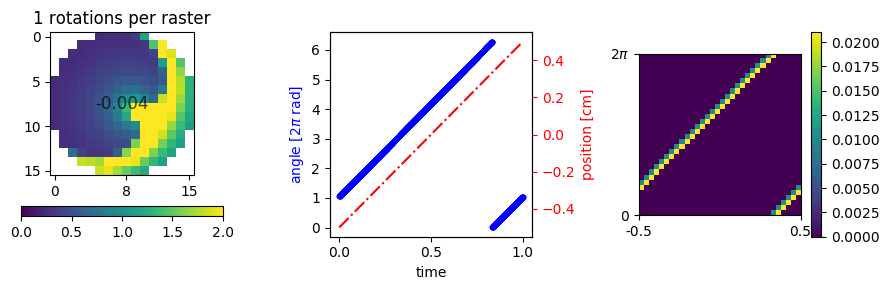

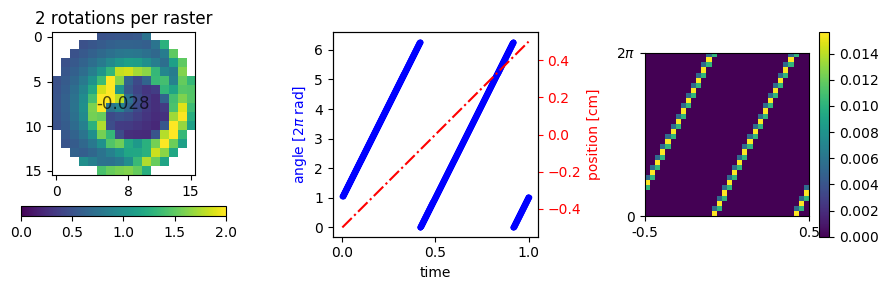

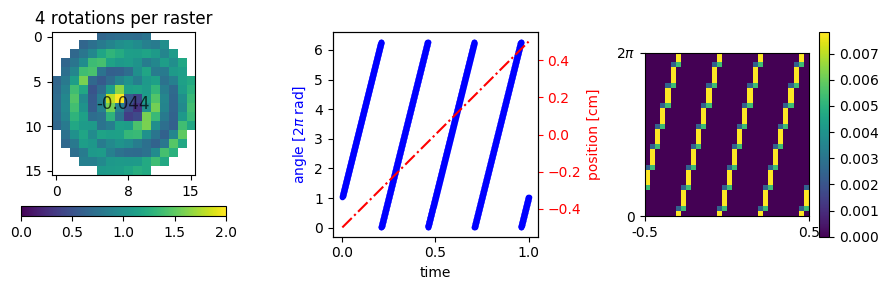

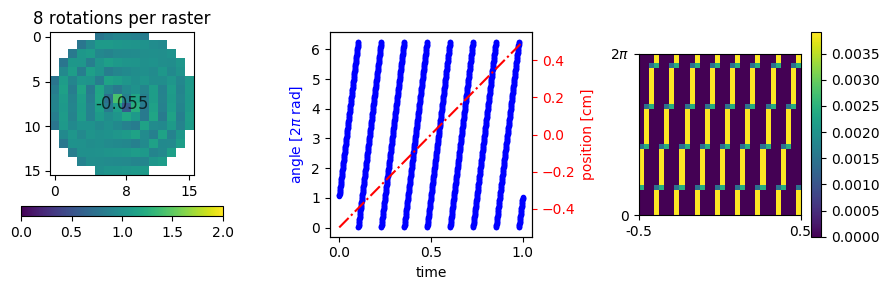

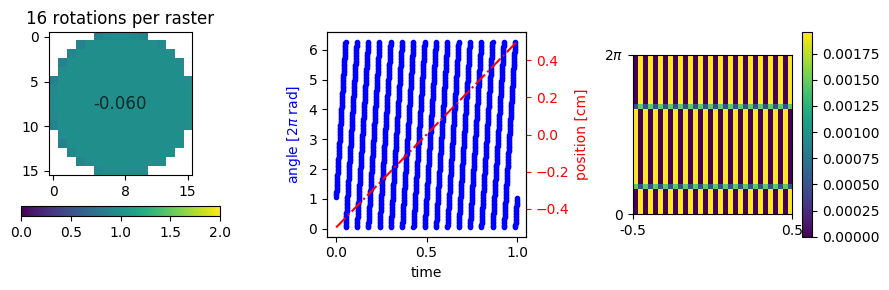

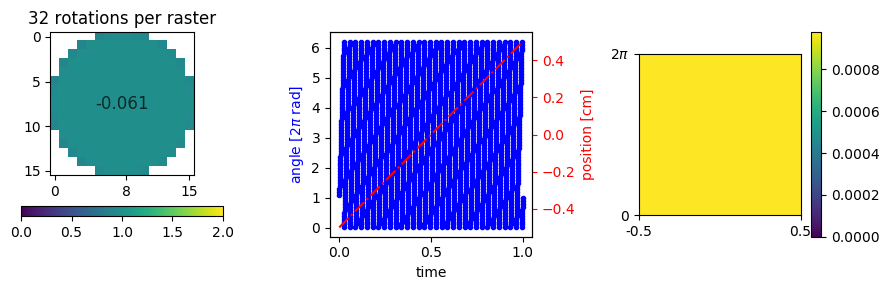

In [19]:
for i in range(len(coverage_maps)):
    plt.figure(figsize=(9,3), dpi=100)
    plt.subplot(1,3,1)

    mask = get_mask(coverage_maps[i])
    cm = coverage_maps[i][0,...]
    cm[~mask] = np.nan
    plt.imshow(cm/ideal_mean, vmin=0, vmax=2)
    m = get_metric(coverage_maps[i])
    plt.text(7.5, 7.5, "{:03.3f}".format(m), ha='center', va='center', size=12, color=(0., 0., 0., 0.7))
    plt.xticks([0, NPIXEL/2, NPIXEL-1])
    plt.title("{} rotations per raster".format(num_rotations[i]))
    plt.colorbar(orientation='horizontal', ticks=[0, 0.5, 1, 1.5, 2])
    
    ax1 = plt.subplot(1,3,(2))
    plt.xlabel('time')
    plt.ylabel('angle [$2\pi$ rad]', color='b')
    t = np.arange(0,1,S_FREQ) + S_FREQ/2
    th, h, v = fly2D(t, N_rotation=num_rotations[i])
    ax1.plot(t, th%(2*np.pi), 'b.')
    ax2 = ax1.twinx()
    ax2.plot(t, h,'r-.')
    ax2.set_ylabel('position [cm]', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.subplot(1,3,3)
    hist, x, y, none = plt.hist2d(h, th%(2*np.pi), 2*NPIXEL)
    plt.cla()
    plt.imshow((hist*S_FREQ).T, vmin=0, origin='lower')
    plt.xticks([-.5, 2*NPIXEL-.5],[-.5, 0.5])
    plt.yticks([-.5, 2*NPIXEL-.5], [0, '2$\pi$'])
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

In [5]:
# More traversals than rotations
num_rasters = 2 ** np.arange(0,6)
coverage_maps = list()
for R in num_rasters:
    kwargs = {'N_raster' : R}
    tstep_guess = TOTAL_TIME / (NPIXEL * max(1, R))
    coverage = probe.coverage(trajectory=raster2Dt, region=region,
                              pixel_size=PIXEL_SIZE,
                              tmin=0, tmax=TOTAL_TIME, tstep=tstep_guess,
                              tkwargs=kwargs)
    coverage_maps.append(coverage)

INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 524,288 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 524,288 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 1,048,576 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 1,048,576 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 2,097,152 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 4,194,304 lines
INFO:root: coverage 256 element grid


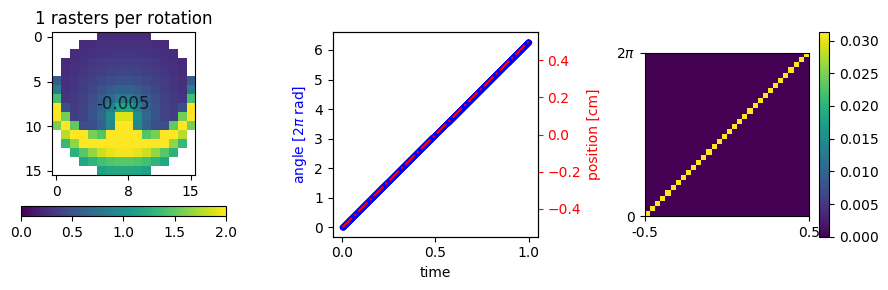

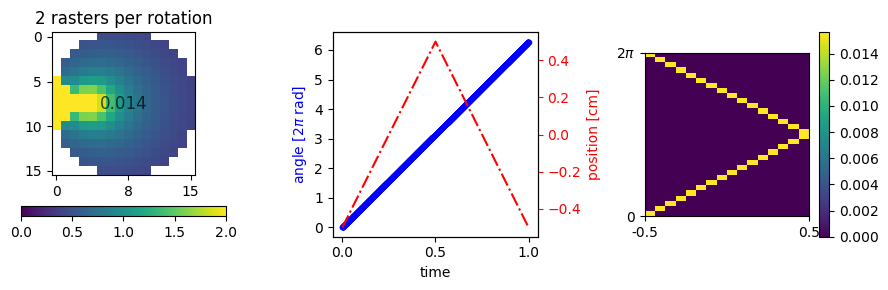

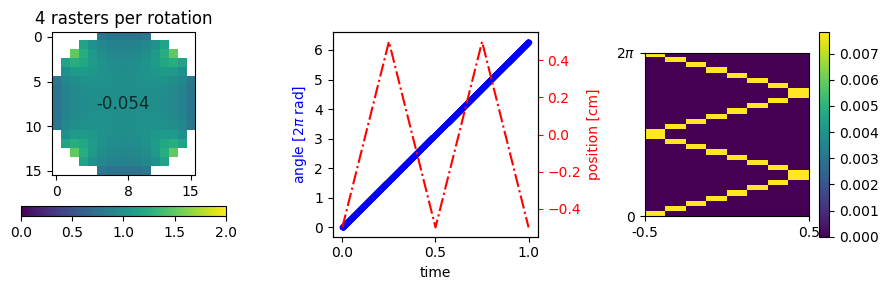

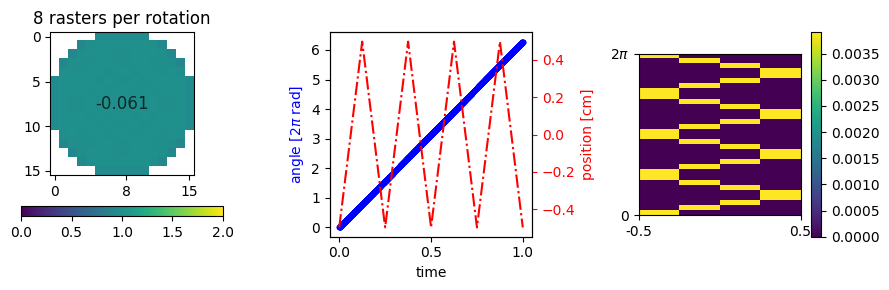

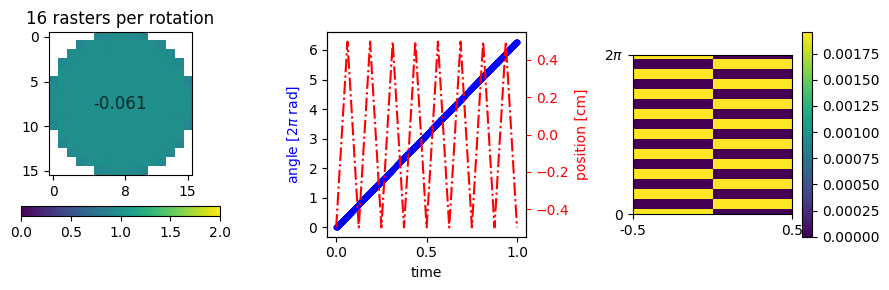

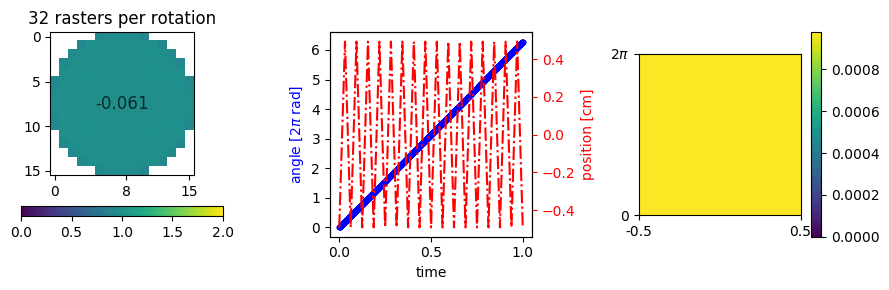

In [6]:
for i in range(len(coverage_maps)):
    plt.figure(figsize=(9,3), dpi=100)
    plt.subplot(1,3,1)
    mask = get_mask(coverage_maps[i])
    cm = coverage_maps[i][0,...]
    cm[~mask] = np.nan
    plt.imshow(cm/ideal_mean, vmin=0, vmax=2)
    m = get_metric(coverage_maps[i])
    plt.text(7.5, 7.5, "{:03.3f}".format(m), ha='center', va='center', size=12, color=(0., 0., 0., 0.7))
    plt.xticks([0, NPIXEL/2, NPIXEL-1])
    plt.title("{} rasters per rotation".format(num_rotations[i]))
#     plt.tight_layout()
    plt.colorbar(orientation='horizontal', ticks=[0, 0.5, 1, 1.5, 2])
    
    ax1 = plt.subplot(1,3,2)
    plt.xlabel('time')
    plt.ylabel('angle [$2\pi$ rad]', color='b')
    t = np.arange(0,1,S_FREQ) + S_FREQ/2
    th, h, v = raster2Dt(t, N_raster=num_rasters[i])
    ax1.plot(t, th%(2*np.pi), 'b.')
    ax2 = ax1.twinx()
    ax2.plot(t, h,'r-.')
    ax2.set_ylabel('position [cm]', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.subplot(1,3,3)
    hist, x, y, none = plt.hist2d(h, th%(2*np.pi), 2*NPIXEL)
    plt.cla()
    plt.imshow((hist*S_FREQ).T, vmin=0, origin='lower')
    plt.xticks([-.5, 2*NPIXEL-.5],[-.5, 0.5])
    plt.yticks([-.5, 2*NPIXEL-.5], [0, '2$\pi$'])
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

In [7]:
# More traversals than rotations
num_rasters = 2 ** np.arange(0,6)
coverage_maps = list()
for R in num_rasters:
    kwargs = {'N_raster' : R}
    tstep_guess = TOTAL_TIME / (NPIXEL * max(1, R))
    coverage = probe.coverage(trajectory=raster2Ds, region=region,
                              pixel_size=PIXEL_SIZE,
                              tmin=0, tmax=TOTAL_TIME, tstep=tstep_guess,
                              tkwargs=kwargs)
    coverage_maps.append(coverage)

INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 524,288 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 524,288 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 864,256 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 1,261,568 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 1,744,896 lines
INFO:root: coverage 256 element grid
INFO:tike.probe: line_width is 0.00390625 cm
INFO:tike.probe: probe uses 256 lines
INFO:tike.probe: procedure is 3,260,416 lines
INFO:root: coverage 256 element grid


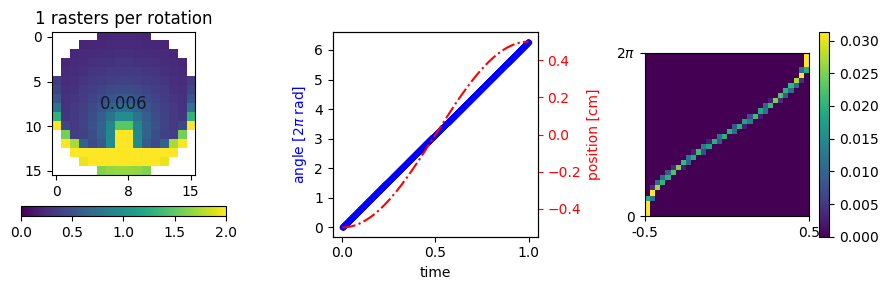

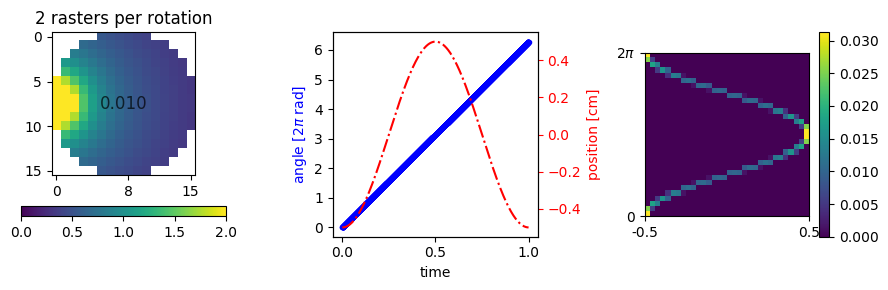

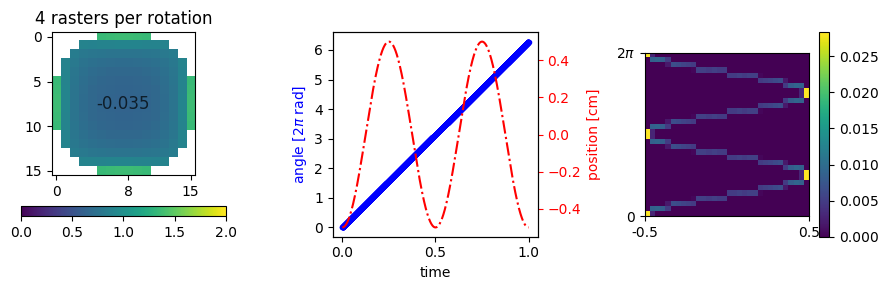

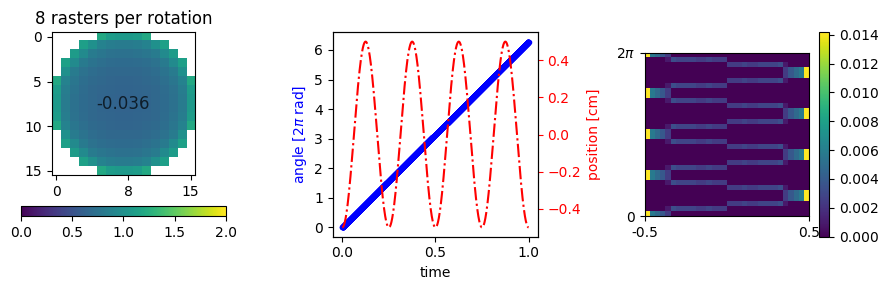

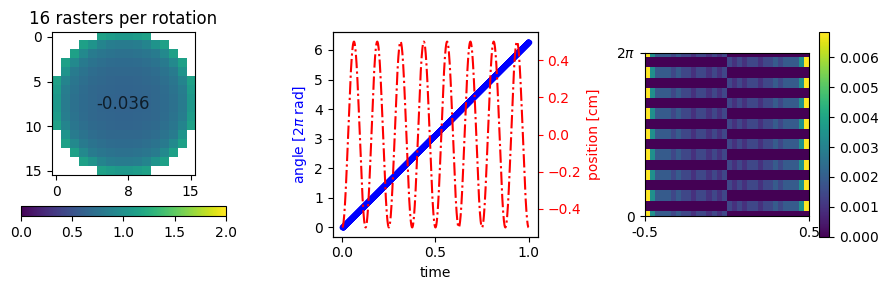

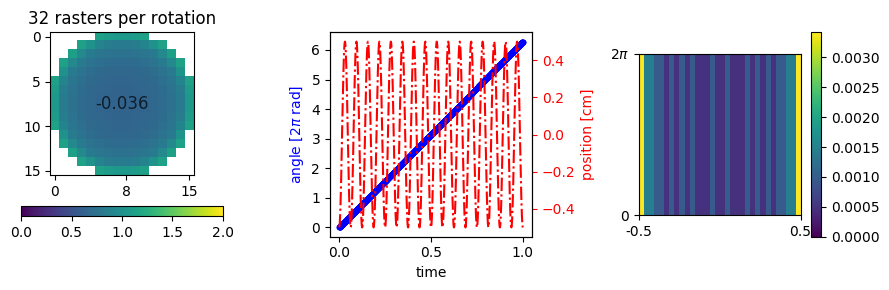

In [8]:
for i in range(len(coverage_maps)):
    plt.figure(figsize=(9,3), dpi=100)
    plt.subplot(1,3,1)
    mask = get_mask(coverage_maps[i])
    cm = coverage_maps[i][0,...]
    cm[~mask] = np.nan
    plt.imshow(cm/ideal_mean, vmin=0, vmax=2)
    m = get_metric(coverage_maps[i])
    plt.text(7.5, 7.5, "{:03.3f}".format(m), ha='center', va='center', size=12, color=(0., 0., 0., 0.7))
    plt.xticks([0, NPIXEL/2, NPIXEL-1])
    plt.title("{} rasters per rotation".format(num_rotations[i]))
#     plt.tight_layout()
    plt.colorbar(orientation='horizontal', ticks=[0, 0.5, 1, 1.5, 2])
    
    ax1 = plt.subplot(1,3,(2))
    plt.xlabel('time')
    plt.ylabel('angle [$2\pi$ rad]', color='b')
    f = 1/2**8
    t = np.arange(0,1,S_FREQ) + S_FREQ/2
    th, h, v = raster2Ds(t, N_raster=num_rasters[i])
    ax1.plot(t, th%(2*np.pi), 'b.')
    ax2 = ax1.twinx()
    ax2.plot(t, h,'r-.')
    ax2.set_ylabel('position [cm]', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.subplot(1,3,3)
    hist, x, y, none = plt.hist2d(h, th%(2*np.pi), 2*NPIXEL)
    plt.cla()
    plt.imshow((hist*S_FREQ).T, vmin=0, origin='lower')
    plt.xticks([-.5, 2*NPIXEL-.5],[-.5, 0.5])
    plt.yticks([-.5, 2*NPIXEL-.5], [0, '2$\pi$'])
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()